In [1]:
import os
import os.path as op
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
%matplotlib inline
import seaborn as sns
sns.set_theme(style="darkgrid", color_codes=True)
sns.set(font_scale=1.35, style="ticks") #set styling preferences
import statsmodels.api as sm
from scipy import stats
import math
from math import pi
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
from scipy.spatial.distance import cdist
from scipy.cluster.vq import kmeans2,vq, whiten
import sidetable

In [2]:
# Show all columns and rows
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [3]:
# Showing the entire number in dataframe
pd.set_option('float_format', '{:f}'.format)

In [4]:
%%time
stacked_rh_path = "https://beam-core-act.s3.amazonaws.com/deepDive/CleanData/SanFrancisco/Stacked/"
sf_stacked_rh_price = pd.read_csv(stacked_rh_path + 'sf_2018_stacked_rh_price_10_8_22.csv')

CPU times: total: 6min 11s
Wall time: 17min 58s


In [8]:
sf_stacked_rh_price['income_level'] = np.where(sf_stacked_rh_price['income']>= 94000, 'High Income', 'Low Income')

In [6]:
# Column with four summarized modes
sf_stacked_rh_price['mode_choice_actual_4']  = np.where((sf_stacked_rh_price['mode_choice_actual_5'] == 'walk')|(sf_stacked_rh_price['mode_choice_actual_5'] == 'bike'),
                                                        'walk/bike', sf_stacked_rh_price['mode_choice_actual_5'])

#### Tour Category and Income density plot

In [9]:
# Draw Plot
#plt.figure(figsize=(16,10), dpi= 80)
#sns.kdeplot(sf_stacked_rh_price.loc[sf_stacked_rh_price['lever_position'] == 0.25, "Potential_INEXUS_in_dollar"], shade=True, color="g", label="Ridehail Price 25%", alpha=.7)
#sns.kdeplot(sf_stacked_rh_price.loc[sf_stacked_rh_price['lever_position'] == 0.5, "Potential_INEXUS_in_dollar"], shade=True, color="black", label="Ridehail Price 50%", alpha=.7)
#sns.kdeplot(sf_stacked_rh_price.loc[sf_stacked_rh_price['lever_position'] == 1.0, "Potential_INEXUS_in_dollar"], shade=True, color="red", label="Baseline", alpha=.9)
#sns.kdeplot(sf_stacked_rh_price.loc[sf_stacked_rh_price['lever_position'] == 1.5, "Potential_INEXUS_in_dollar"], shade=True, color="dodgerblue", label="Ridehail Price 150%", alpha=.7)
#sns.kdeplot(sf_stacked_rh_price.loc[sf_stacked_rh_price['lever_position'] == 2.0, "Potential_INEXUS_in_dollar"], shade=True, color="gold", label="Ridehail Price 200%", alpha=.7)

# Decoration
#plt.title('Density Plot', fontsize=22)
#plt.legend()
#plt.show()

In [10]:
sf_stacked_rh_price.groupby('tour_category')['tour_category'].count()

tour_category
atwork           1259530
joint             280424
mandatory        7045908
non_mandatory    6229515
Name: tour_category, dtype: int64

In [11]:
sf_stacked_rh_price.groupby(['tour_category','lever_position'])['tour_category'].count()

tour_category  lever_position
atwork         0.000000           207839
               0.250000           209923
               0.500000           210223
               1.000000           210485
               1.500000           210501
               2.000000           210559
joint          0.000000            46806
               0.250000            46760
               0.500000            46721
               1.000000            46704
               1.500000            46711
               2.000000            46722
mandatory      0.000000          1179614
               0.250000          1173844
               0.500000          1173262
               1.000000          1173122
               1.500000          1173041
               2.000000          1173025
non_mandatory  0.000000          1039620
               0.250000          1038323
               0.500000          1038210
               1.000000          1037835
               1.500000          1037776
               2.000000    

In [12]:
tour_cat_plot =  sf_stacked_rh_price[(sf_stacked_rh_price['tour_category']=='mandatory')|(sf_stacked_rh_price['tour_category']=='non_mandatory')]

In [ ]:
cat_plot = tour_cat_plot[['tour_category', 'Potential_INEXUS_in_dollar','lever_position', 'income_quartiles','income_level']]

In [38]:
#tour_cat_inc_plot =  tour_cat_plot[(tour_cat_plot['income_quartiles']=='1stQ')|(tour_cat_plot['income_quartiles']=='4thQ')]

In [41]:
#cat_inc_plot = tour_cat_inc_plot[['tour_category', 'Potential_INEXUS_in_dollar','lever_position', 'income_quartiles','income_level']]

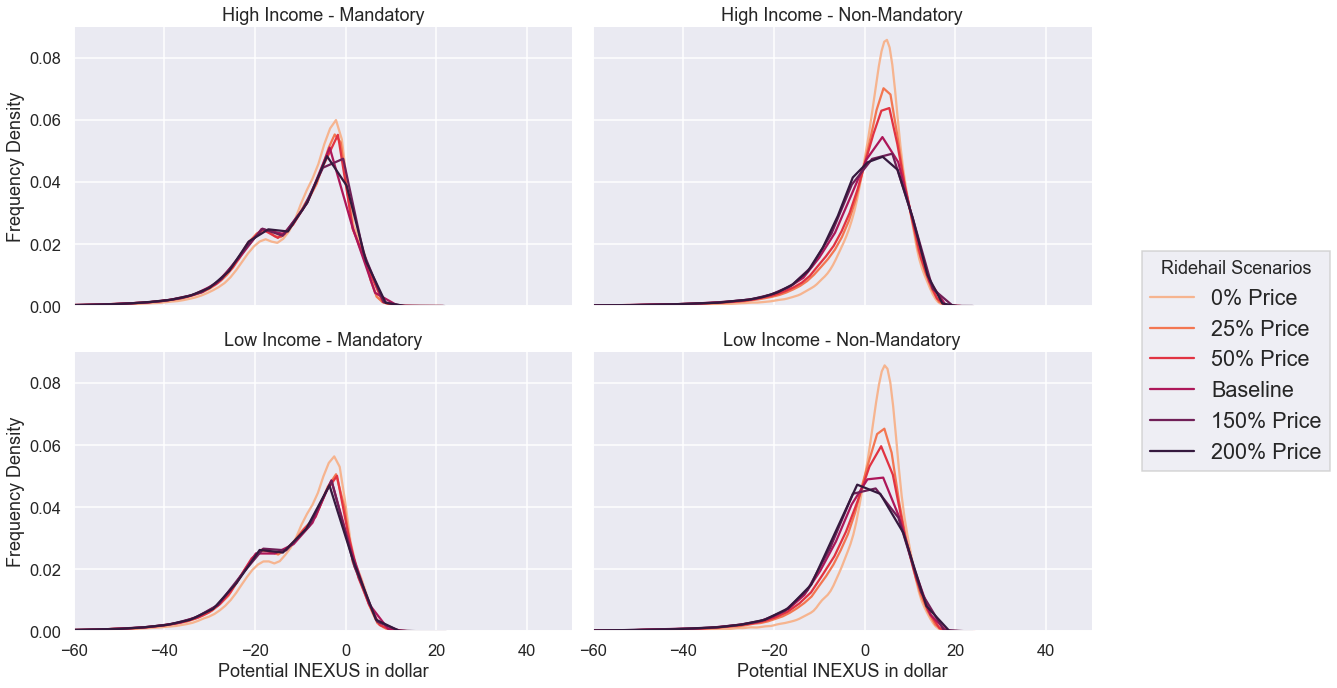

In [337]:
sns.set()
sns.set_context('talk')
sns.set_style('darkgrid')
grid = sns.FacetGrid(cat_plot.loc[cat_plot['Potential_INEXUS_in_dollar'] > -1000], row = 'income_level', 
                     col='tour_category', 
                     hue='lever_position', height=5.2, aspect=1.5, palette = "rocket_r", legend_out=True)
grid.map(sns.kdeplot, 'Potential_INEXUS_in_dollar', bw_adjust = 1)

#grid.add_legend()

for ax, title in zip(grid.axes.flat, ['High Income - Mandatory', 'High Income - Non-Mandatory', 
                                     'Low Income - Mandatory', 'Low Income - Non-Mandatory']):
    ax.set_title(title)
    
grid.set(xlim=(-60,50))

plt.legend(title="Ridehail Scenarios", labels = ['0% Price', '25% Price','50% Price','Baseline','150% Price','200% Price'],
         fontsize='large', fancybox=False, bbox_to_anchor=(1.5, 1.4), ncol=1, frameon=True, loc = 'best')

grid.set_ylabels('Frequency Density', size=18)
grid.set_xlabels('Potential INEXUS in dollar', size=18)

# Squash down a little and add title to facetgrid    
plt.subplots_adjust(top=0.9)
#grid.fig.suptitle('Realized INEXUS in dollar across income levels in different lever positions')

In [ ]:
sns.set()
sns.set_context('talk')
sns.set_style('darkgrid')
grid = sns.FacetGrid(cat_plot.loc[cat_plot['Potential_INEXUS_in_dollar'] > -1000], row = 'income_level', 
                     col='tour_category', 
                     hue='lever_position', height=5.2, aspect=1.5, palette = "rocket_r", legend_out=True)
grid.map(sns.kdeplot, 'Potential_INEXUS_in_dollar', bw_adjust = 1)

#grid.add_legend()

for ax, title in zip(grid.axes.flat, ['High Income - Mandatory', 'High Income - Non-Mandatory', 
                                     'Low Income - Mandatory', 'Low Income - Non-Mandatory']):
    ax.set_title(title)
    
grid.set(xlim=(-60,50))

plt.legend(title="Ridehail Scenarios", labels = ['0% Price', '25% Price','50% Price','Baseline','150% Price','200% Price'],
         fontsize='small', fancybox=False, bbox_to_anchor=(1.4, 1.4), ncol=1, frameon=True, loc = 'best')

grid.set_ylabels('Frequency Density', size=16)
grid.set_xlabels('Potential INEXUS in dollar', size=16)

# Squash down a little and add title to facetgrid    
plt.subplots_adjust(top=0.9)
#grid.fig.suptitle('Realized INEXUS in dollar across income levels in different lever positions')

In [15]:
# Column with six summarized modes
#conditions  = [(sf_stacked_rh_price['lever_position'] == 0) & (sf_stacked_rh_price['income_quartiles'] == '1stQ'), 
               #(sf_stacked_rh_price['lever_position'] == 1) & (sf_stacked_rh_price['income_quartiles'] == '1stQ'),
               #(sf_stacked_rh_price['lever_position'] == 2) & (sf_stacked_rh_price['income_quartiles'] == '1stQ'),
               #(sf_stacked_rh_price['lever_position'] == 0) & (sf_stacked_rh_price['income_quartiles'] == '4thQ'), 
               #(sf_stacked_rh_price['lever_position'] == 1) & (sf_stacked_rh_price['income_quartiles'] == '4thQ'),
               #(sf_stacked_rh_price['lever_position'] == 2) & (sf_stacked_rh_price['income_quartiles'] == '4thQ')]
               
#choices = [ '0% Price - Low Income', '100% Price - Low Income', '200% Price - Low Income', 
           #'0% Price - High Income', '100% Price - High Income', '200% Price - High Income']

In [16]:
#sf_stacked_rh_price['income_lever'] = np.select(conditions, choices, default=None)

In [17]:
# Column with six summarized modes
#conditions  = [(tour_cat_plot['tour_category'] == 'mandatory') & (tour_cat_plot['income_quartiles'] == '1stQ'), 
               #(tour_cat_plot['tour_category'] == 'non_mandatory') & (tour_cat_plot['income_quartiles'] == '1stQ'),
               #(tour_cat_plot['tour_category'] == 'mandatory') & (tour_cat_plot['income_quartiles'] == '4thQ'),
               #(tour_cat_plot['tour_category'] == 'non_mandatory') & (tour_cat_plot['income_quartiles'] == '4thQ')]
               
#choices = [ 'Mandatory - Low Income', 'Non-Mandatory - Low Income', 
           #'Mandatory - High Income', 'Non-Mandatory - High Income']

In [47]:
#tour_cat_plot['mand_income'] = np.select(conditions, choices, default=None)

In [344]:
sns.set(rc={'figure.figsize':(10,7)})
sns.set_context('talk')

palette = ["#BBCC33", "#FDB366", "#44BB99", "#DD3D2D"]

sns.set_style("whitegrid")
sns.set_palette(palette)

ax = sns.kdeplot(data=tour_cat_plot.dropna(subset=['mand_income']), x="Potential_INEXUS_in_dollar", hue="mand_income", 
                 fill=False, alpha=1, palette=palette, bw_adjust=0.3)
sns.move_legend(ax, "upper center", bbox_to_anchor=(0.49, -0.2), ncol=2, title=None, frameon=True)
plt.xlim(-60, 40)
plt.xlabel('Potential INEXUS in dollar', fontsize=16)
plt.ylabel('Frequency Density', fontsize=16)
plt.show()

KeyError: ['mand_income']

#### Boxplot Potential relative to baseline

In [ ]:
sf_stacked_rh_price["mode_actual_baseline"] = np.where(sf_stacked_rh_price['lever_position']==1, sf_stacked_rh_price["mode_choice_actual_BEAM"], None)

In [ ]:
sf_stacked_rh_price["mode_actual_baseline"] = sf_stacked_rh_price.groupby(['IDMerged','tripIndex'])['mode_actual_baseline'].transform(lambda x: x.ffill().bfill())

In [48]:
sf_stacked_rh_price["mode_planned_baseline"] = np.where(sf_stacked_rh_price['lever_position']==1, sf_stacked_rh_price["mode_choice_planned_BEAM"], None)

In [49]:
sf_stacked_rh_price["mode_planned_baseline"] = sf_stacked_rh_price.groupby(['IDMerged','tripIndex'])['mode_planned_baseline'].transform(lambda x: x.ffill().bfill())

In [ ]:
same_mode_actual = sf_stacked_rh_price[sf_stacked_rh_price['mode_actual_baseline'] == sf_stacked_rh_price['mode_choice_actual_BEAM']]

In [50]:
same_mode_planned = sf_stacked_rh_price[sf_stacked_rh_price['mode_planned_baseline'] == sf_stacked_rh_price['mode_choice_planned_BEAM']]

In [ ]:
diff_mode_actual = sf_stacked_rh_price[sf_stacked_rh_price['mode_actual_baseline'] != sf_stacked_rh_price['mode_choice_actual_BEAM']]

In [51]:
diff_mode_planned = sf_stacked_rh_price[sf_stacked_rh_price['mode_planned_baseline'] != sf_stacked_rh_price['mode_choice_planned_BEAM']]

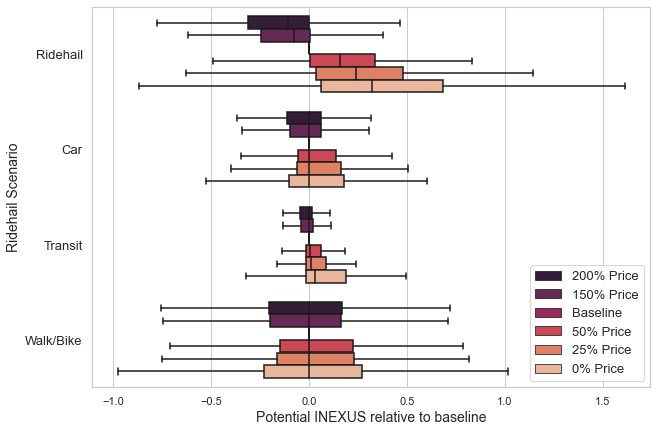

In [348]:
sns.set(rc={'figure.figsize':(10,7)})
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x="logsum_relative_to_baseline", y="mode_choice_actual_4", order=["ride_hail","car","transit","walk/bike"], 
                 hue="lever_position", hue_order = [2, 1.5, 1, 0.5, 0.25, 0],
                 data=same_mode_planned, palette="rocket", showfliers=False)
ax.set_xlabel('Potential INEXUS relative to baseline', fontsize = 14)
ax.set_ylabel('Ridehail Scenario', fontsize = 14)
ax.set_yticklabels(['Ridehail', 'Car','Transit','Walk/Bike'], size = 13)
#ax.set_xlim([-3, 3]) 
handles, _ = ax.get_legend_handles_labels()   # Get the artists.
ax.legend(handles, ['200% Price', '150% Price','Baseline','50% Price','25% Price','0% Price'], loc="best", prop={'size': 13}) # Associate manually the artists to a label.

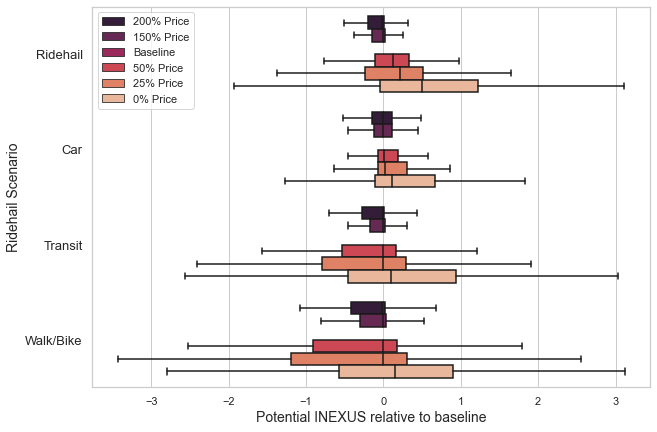

In [347]:
sns.set(rc={'figure.figsize':(10,7)})
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x="logsum_relative_to_baseline", y="mode_choice_actual_4", order=["ride_hail","car","transit","walk/bike"],
                 hue="lever_position", hue_order = [2, 1.5, 1, 0.5, 0.25, 0],
                 data=diff_mode_planned, palette="rocket", showfliers=False)
ax.set_xlabel('Potential INEXUS relative to baseline', fontsize = 14)
ax.set_ylabel('Ridehail Scenario', fontsize = 14)
ax.set_yticklabels(['Ridehail', 'Car','Transit','Walk/Bike'], size = 13)
handles, _ = ax.get_legend_handles_labels()   # Get the artists.
ax.legend(handles, ['200% Price', '150% Price','Baseline','50% Price','25% Price','0% Price'], loc="best") # Associate manually the artists to a label.

#### Income level - Lever position - Density Plot

In [54]:
# Column with six summarized modes
conditions  = [(sf_stacked_rh_price['lever_position'] == 0) & (sf_stacked_rh_price['income_quartiles'] == '1stQ'), 
               (sf_stacked_rh_price['lever_position'] == 1) & (sf_stacked_rh_price['income_quartiles'] == '1stQ'),
               (sf_stacked_rh_price['lever_position'] == 2) & (sf_stacked_rh_price['income_quartiles'] == '1stQ'),
               (sf_stacked_rh_price['lever_position'] == 0) & (sf_stacked_rh_price['income_quartiles'] == '4thQ'), 
               (sf_stacked_rh_price['lever_position'] == 1) & (sf_stacked_rh_price['income_quartiles'] == '4thQ'),
               (sf_stacked_rh_price['lever_position'] == 2) & (sf_stacked_rh_price['income_quartiles'] == '4thQ')]
               
choices = [ '0% Price - Low Income', '100% Price - Low Income', '200% Price - Low Income', 
           '0% Price - High Income', '100% Price - High Income', '200% Price - High Income']

In [55]:
sf_stacked_rh_price['income_lever'] = np.select(conditions, choices, default=None)

In [134]:
# Column with six summarized modes
conditions  = [(sf_stacked_rh_price['lever_position'] == 0) & (sf_stacked_rh_price['income_deciles'] == '1stD'), 
               (sf_stacked_rh_price['lever_position'] == 1) & (sf_stacked_rh_price['income_deciles'] == '1stD'),
               (sf_stacked_rh_price['lever_position'] == 2) & (sf_stacked_rh_price['income_deciles'] == '1stD'),
               (sf_stacked_rh_price['lever_position'] == 0) & (sf_stacked_rh_price['income_deciles'] == '10thD'), 
               (sf_stacked_rh_price['lever_position'] == 1) & (sf_stacked_rh_price['income_deciles'] == '10thD'),
               (sf_stacked_rh_price['lever_position'] == 2) & (sf_stacked_rh_price['income_deciles'] == '10thD')]
               
choices = [ '0% Price - Low Income', '100% Price - Low Income', '200% Price - Low Income', 
           '0% Price - High Income', '100% Price - High Income', '200% Price - High Income']

In [135]:
sf_stacked_rh_price['decile_lever'] = np.select(conditions, choices, default=None)

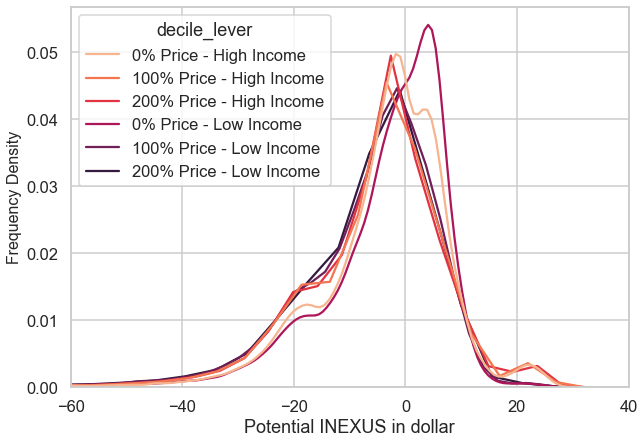

In [137]:
sns.set()
sns.set_context('talk')

palette = ["#BBCC33", "#FDB366", "#44BB99", "#DD3D2D",
           "#FEDA8B", "#9970AB"]

sns.set_style("whitegrid")
sns.set_palette(palette)

sns.kdeplot(data=sf_stacked_rh_price.dropna(subset=['income_lever']), x="Potential_INEXUS_in_dollar", hue="decile_lever", 
           fill=False, common_norm=False, alpha=1, palette='rocket_r')
plt.xlim(-60, 40)
plt.xlabel('Potential INEXUS in dollar', fontsize=18)
plt.ylabel('Frequency Density', fontsize=16)
plt.show()

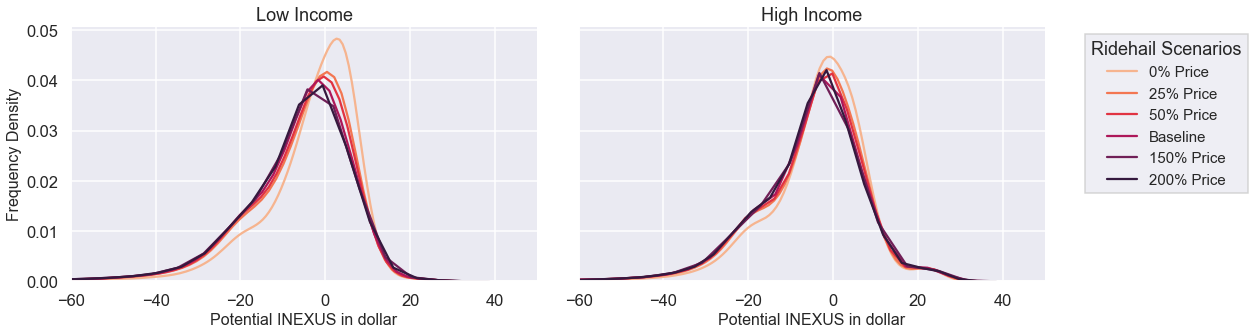

In [277]:
sns.set()
sns.set_context('talk')
sns.set_style('darkgrid')
grid = sns.FacetGrid(sf_stacked_rh_price.loc[(sf_stacked_rh_price['income_deciles']=='1stD')|
                                            (sf_stacked_rh_price['income_deciles']=='10thD')], 
                     col = 'income_deciles', col_order=['1stD','10thD'],
                     hue='lever_position', height=5, aspect=1.5, palette = "rocket_r", legend_out=True )
grid.map(sns.kdeplot, 'Potential_INEXUS_in_dollar',bw_adjust = 2.5)
#grid.set(xlim=(14, sf_stacked_rh_price['Realized_INEXUS_in_dollar'].max()), ylim=(0,0.06))
#grid.add_legend()

for ax, title in zip(grid.axes.flat, ['Low Income', 'High Income']):
    ax.set_title(title)

grid.set(xlim=(-60,50))

plt.legend(title="Ridehail Scenarios", labels = ['0% Price', '25% Price','50% Price','Baseline','150% Price','200% Price'],
         fontsize='small', fancybox=False, bbox_to_anchor=(1.45, 1), ncol=1, frameon=True, loc = 'best')

grid.set_ylabels('Frequency Density', size=16)
grid.set_xlabels('Potential INEXUS in dollar', size=16)

# Squash down a little and add title to facetgrid    
plt.subplots_adjust(top=0.9)
#grid.fig.suptitle('Realized INEXUS in dollar across income levels in different lever positions')

In [306]:
a = sf_stacked_rh_price[(sf_stacked_rh_price['income_deciles']=='1stD')|(sf_stacked_rh_price['income_deciles']=='10thD')]

In [307]:
b = a[a['lever_position']==1]

In [92]:
a['Potential_INEXUS_in_dollar'].describe()

count   1234909.000000
mean         -6.331891
std          15.009132
min        -973.303289
25%         -12.184558
50%          -3.609467
75%           1.920060
max          30.892333
Name: Potential_INEXUS_in_dollar, dtype: float64

In [110]:
# determine the quartile values to use with pd.cut
deciles = sf_stacked_rh_price['income'].quantile([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]).tolist()

In [111]:
deciles

[-14600.0,
 24700.0,
 41240.0,
 58000.0,
 75000.0,
 94000.0,
 114200.0,
 140000.0,
 175000.0,
 241000.0,
 1354000.0]

In [112]:
# Column with six summarized modes
conditions  = [(sf_stacked_rh_price['income'] >= -14600) & (sf_stacked_rh_price['income'] < 24700), 
               (sf_stacked_rh_price['income'] >= 24700) & (sf_stacked_rh_price['income'] < 41240),
               (sf_stacked_rh_price['income'] >=  41240) & (sf_stacked_rh_price['income'] < 58000),
               (sf_stacked_rh_price['income'] >= 58000) & (sf_stacked_rh_price['income'] < 75000), 
               (sf_stacked_rh_price['income'] >=  75000) & (sf_stacked_rh_price['income'] < 94000),
               (sf_stacked_rh_price['income'] >=  94000) & (sf_stacked_rh_price['income'] < 114200),
               (sf_stacked_rh_price['income'] >=  114200) & (sf_stacked_rh_price['income'] < 140000),
               (sf_stacked_rh_price['income'] >=  140000) & (sf_stacked_rh_price['income'] < 175000),
               (sf_stacked_rh_price['income'] >=  175000) & (sf_stacked_rh_price['income'] < 241000),
               (sf_stacked_rh_price['income'] >=  241000) & (sf_stacked_rh_price['income'] <= 1354000)]

choices = [ '1stD', '2ndD', '3rdD', 
           '4thD', '5thD', '6thD', '7thD', '8thD', '9thD','10thD']

In [113]:
sf_stacked_rh_price['income_deciles'] = np.select(conditions, choices, default=None)

C:\Users\nazanin\.conda\envs\geo_env\lib\site-packages\seaborn\utils.py:413: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  new_legend = legend_func(handles, labels, loc=loc, **props)


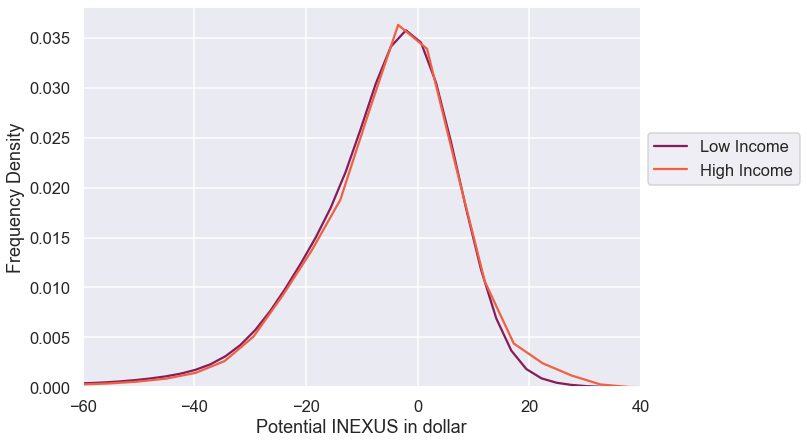

In [349]:
sns.set()
sns.set_context('talk')

sns.set_style("darkgrid")
sns.set_palette(palette)

ax=sns.kdeplot(data=b, x="Potential_INEXUS_in_dollar", hue="income_deciles", 
            fill=False, common_norm=False, alpha=1, palette=sns.color_palette('rocket_r', n_colors=2), bw_adjust =4)

sns.move_legend(ax, "right", bbox_to_anchor=(1.3, 0.6), ncol=1, title=None, frameon=True, labels = ['Low Income', 'High Income'],)

plt.xlim(-60, 40)
plt.xlabel('Potential INEXUS in dollar', fontsize=18)
plt.ylabel('Frequency Density', fontsize=18)
plt.show()

#### Density Plot Potential - Mode - Income

In [19]:
sf_stacked_rh_price['denial'] = np.where(sf_stacked_rh_price['replanning_status'] > 0, 1, 0)

In [24]:
tour_cat_plot['denial'] = np.where(tour_cat_plot['replanning_status'] > 0, 1, 0)

C:\Users\nazanin\AppData\Local\Temp\2\ipykernel_7244\1160953329.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tour_cat_plot['denial'] = np.where(tour_cat_plot['replanning_status'] > 0, 1, 0)


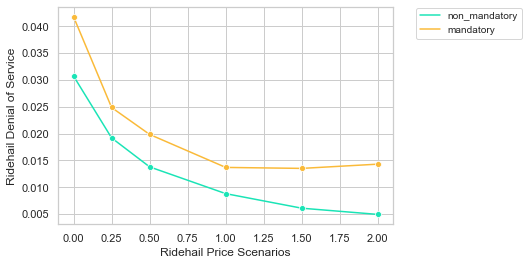

In [25]:
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots()
ax = sns.lineplot(data = tour_cat_plot.loc[tour_cat_plot['mode_choice_actual_4']=='ride_hail'], x = 'lever_position', y = 'denial', hue ='tour_category',
                 palette = 'turbo', marker='o', ci=None)
ax.set(xlabel='Ridehail Price Scenarios', ylabel='Ridehail Denial of Service')
plt.legend(bbox_to_anchor = (1.40, 1.02), fontsize = 10)

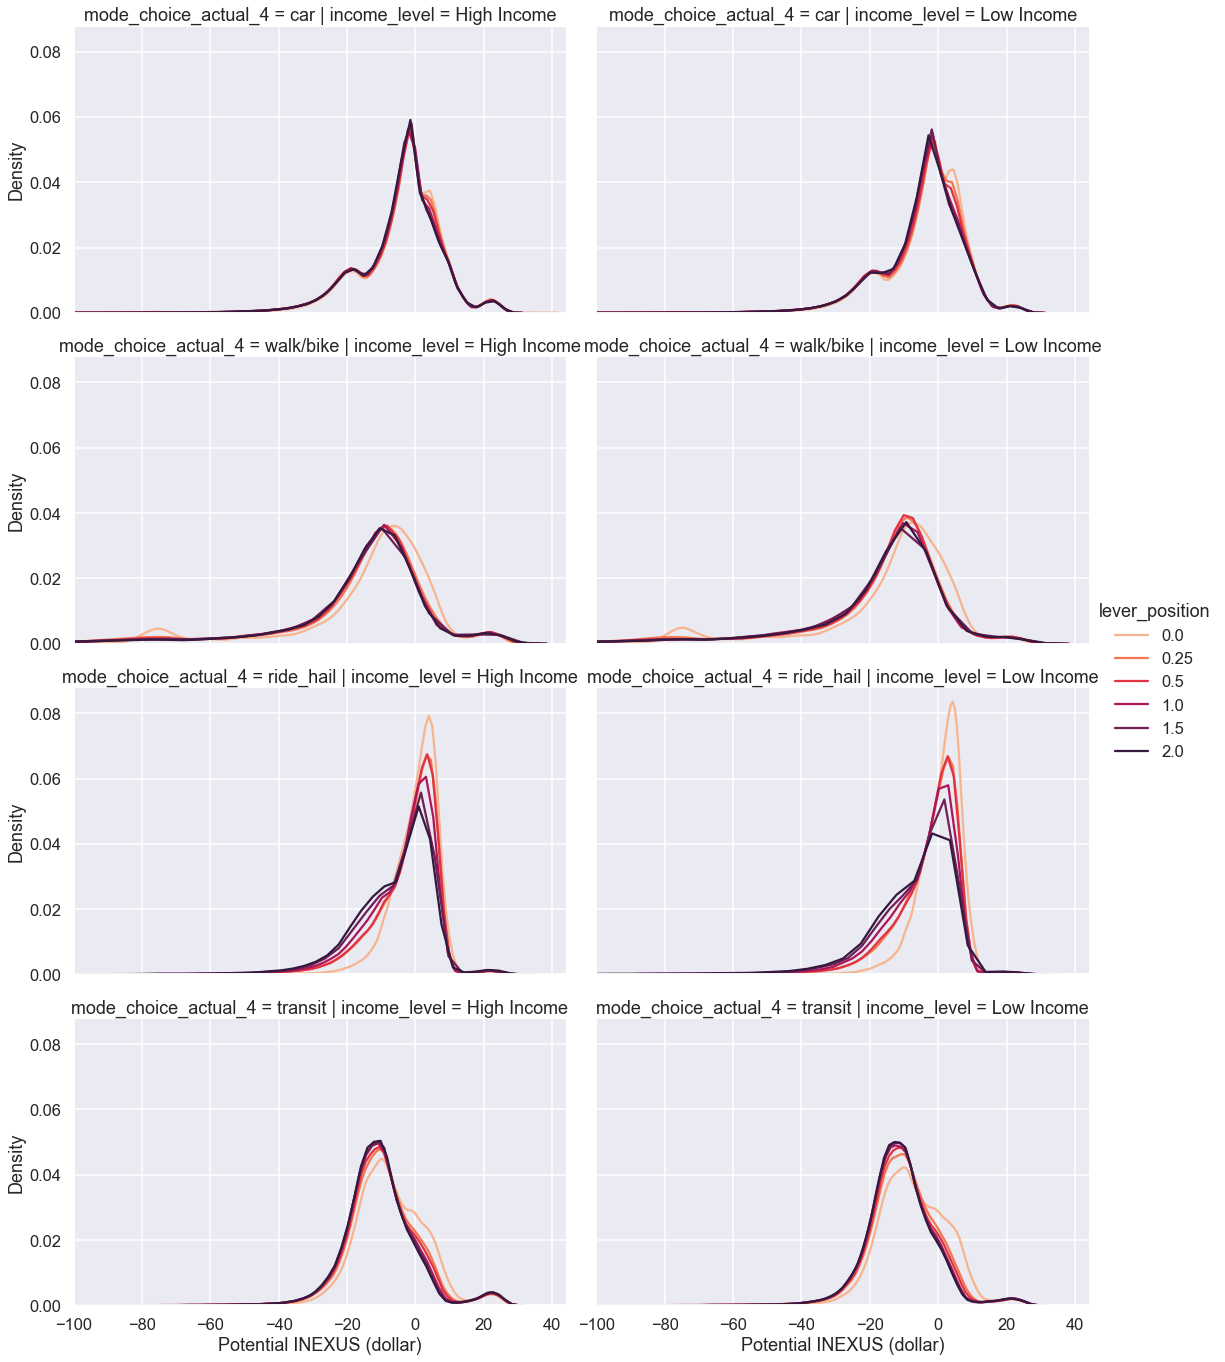

In [21]:
#no replanning
sns.set()
sns.set_context('talk')
sns.set_style('darkgrid')
grid = sns.FacetGrid(sf_stacked_rh_price.loc[sf_stacked_rh_price['mode_choice_actual_BEAM']==sf_stacked_rh_price['mode_choice_planned_BEAM']], 
                     row = 'mode_choice_actual_4' , col='income_level', 
                     hue='lever_position', height=5.2, aspect=1.5, palette=sns.color_palette('rocket_r', n_colors=6), legend_out=True)
grid = grid.map(sns.kdeplot, 'Potential_INEXUS_in_dollar')

#grid.set(xlim=(14, sf_stacked_rh_price['Realized_INEXUS_in_dollar'].max()), ylim=(0,0.06))

grid.add_legend()
#handles, _ = grid.get_legend_handles_labels()   # Get the artists.
#grid.add_legend(handles, ['0% Price', '25% Price','50% Price','Baseline','150% Price','200% Price'], loc="best")   
    
#grid.map(vertical_mean_line_survived, 'Realized_INEXUS_in_dollar') 

grid.set(xlim=(-100,sf_stacked_rh_price['Potential_INEXUS_in_dollar'].max()))

grid.set_ylabels('Density', size=18)
grid.set_xlabels('Potential INEXUS (dollar)', size=18)

# Squash down a little and add title to facetgrid    
plt.subplots_adjust(top=0.9)
#grid.fig.suptitle('Realized INEXUS in dollar across income levels in different lever positions')

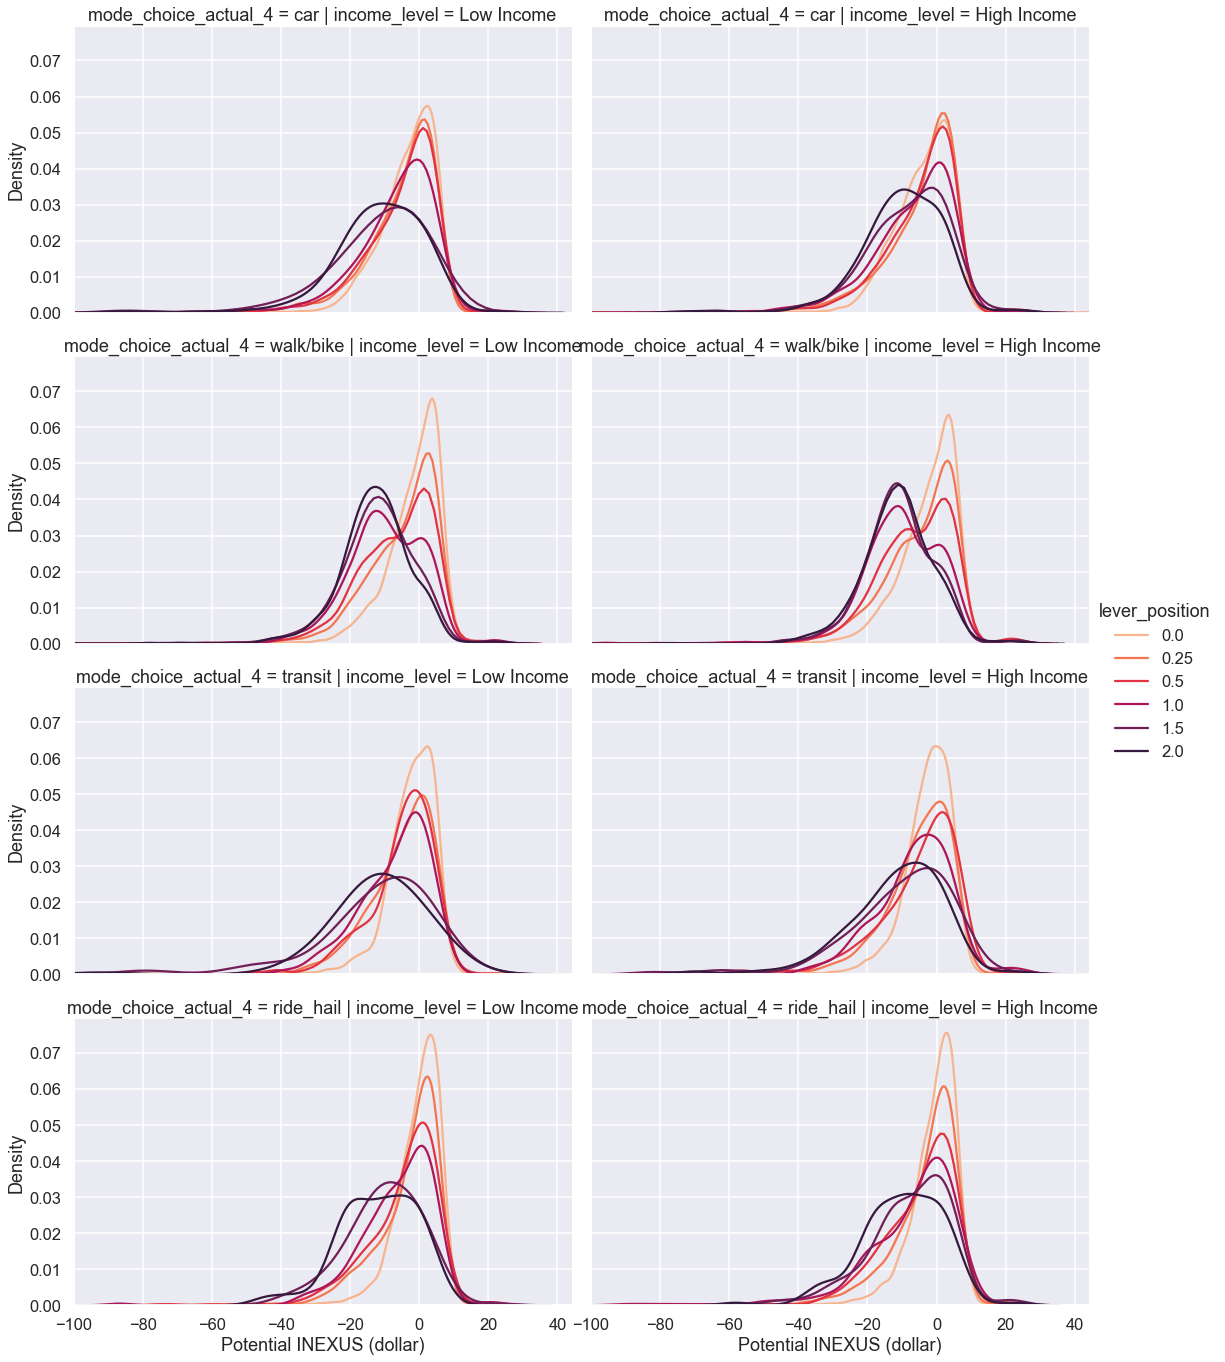

In [27]:
# Replanning
sns.set()
sns.set_context('talk')
sns.set_style('darkgrid')
grid = sns.FacetGrid(sf_stacked_rh_price.loc[sf_stacked_rh_price['mode_choice_actual_BEAM']!=sf_stacked_rh_price['mode_choice_planned_BEAM']], 
                     row = 'mode_choice_actual_4' , col='income_level', 
                     hue='lever_position', height=5.2, aspect=1.5, palette = "rocket_r", legend_out=True)
grid = grid.map(sns.kdeplot, 'Potential_INEXUS_in_dollar')

#grid.set(xlim=(14, sf_stacked_rh_price['Realized_INEXUS_in_dollar'].max()), ylim=(0,0.06))

grid.add_legend()
#handles, _ = grid.get_legend_handles_labels()   # Get the artists.
#grid.add_legend(handles, ['0% Price', '25% Price','50% Price','Baseline','150% Price','200% Price'], loc="best")   
    
#grid.map(vertical_mean_line_survived, 'Realized_INEXUS_in_dollar') 

grid.set(xlim=(-100,sf_stacked_rh_price['Potential_INEXUS_in_dollar'].max()))

grid.set_ylabels('Density', size=18)
grid.set_xlabels('Potential INEXUS (dollar)', size=18)

# Squash down a little and add title to facetgrid    
plt.subplots_adjust(top=0.9)
#grid.fig.suptitle('Realized INEXUS in dollar across income levels in different lever positions')

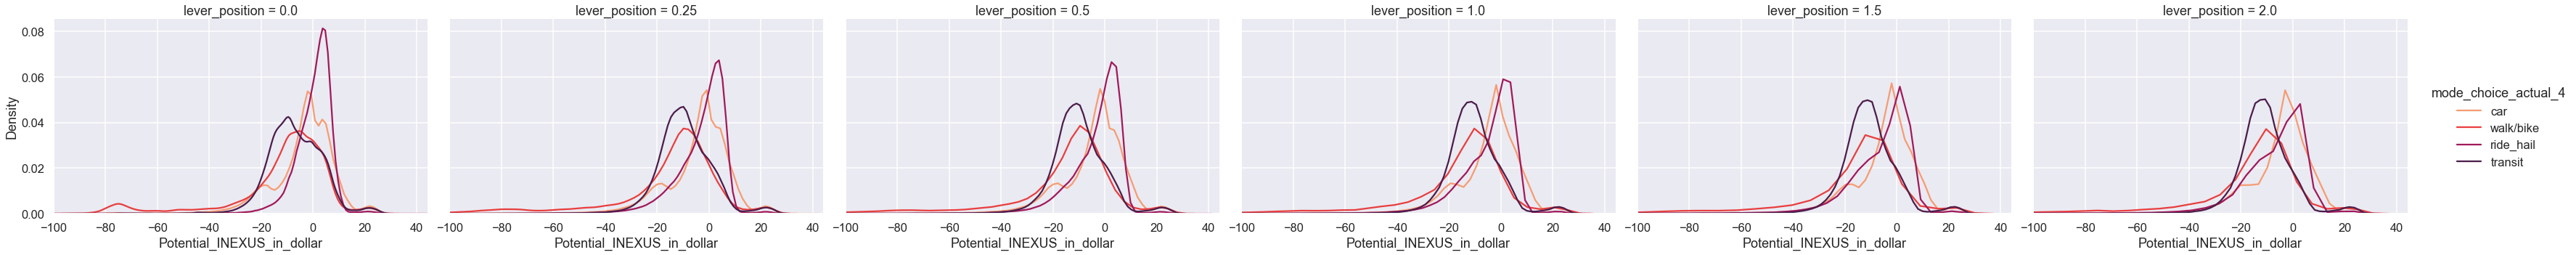

In [76]:
sns.set()
sns.set_context('talk')
sns.set_style('darkgrid')
grid = sns.FacetGrid(sf_stacked_rh_price, 
                     col='lever_position', 
                     hue='mode_choice_actual_4', height=5.2, aspect=1.5, palette = "rocket_r", legend_out=True)
grid = grid.map(sns.kdeplot, 'Potential_INEXUS_in_dollar')

#grid.set(xlim=(14, sf_stacked_rh_price['Realized_INEXUS_in_dollar'].max()), ylim=(0,0.06))

grid.add_legend()
#handles, _ = grid.get_legend_handles_labels()   # Get the artists.
#grid.add_legend(handles, ['0% Price', '25% Price','50% Price','Baseline','150% Price','200% Price'], loc="best")   
    
#grid.map(vertical_mean_line_survived, 'Realized_INEXUS_in_dollar') 

grid.set(xlim=(-100,sf_stacked_rh_price['Potential_INEXUS_in_dollar'].max()))

#grid.set_ylabels('Density', size=18)
#grid.set_xlabels('Potential INEXUS (dollar)', size=18)

# Squash down a little and add title to facetgrid    
plt.subplots_adjust(top=0.9)
#grid.fig.suptitle('Realized INEXUS in dollar across income levels in different lever positions')

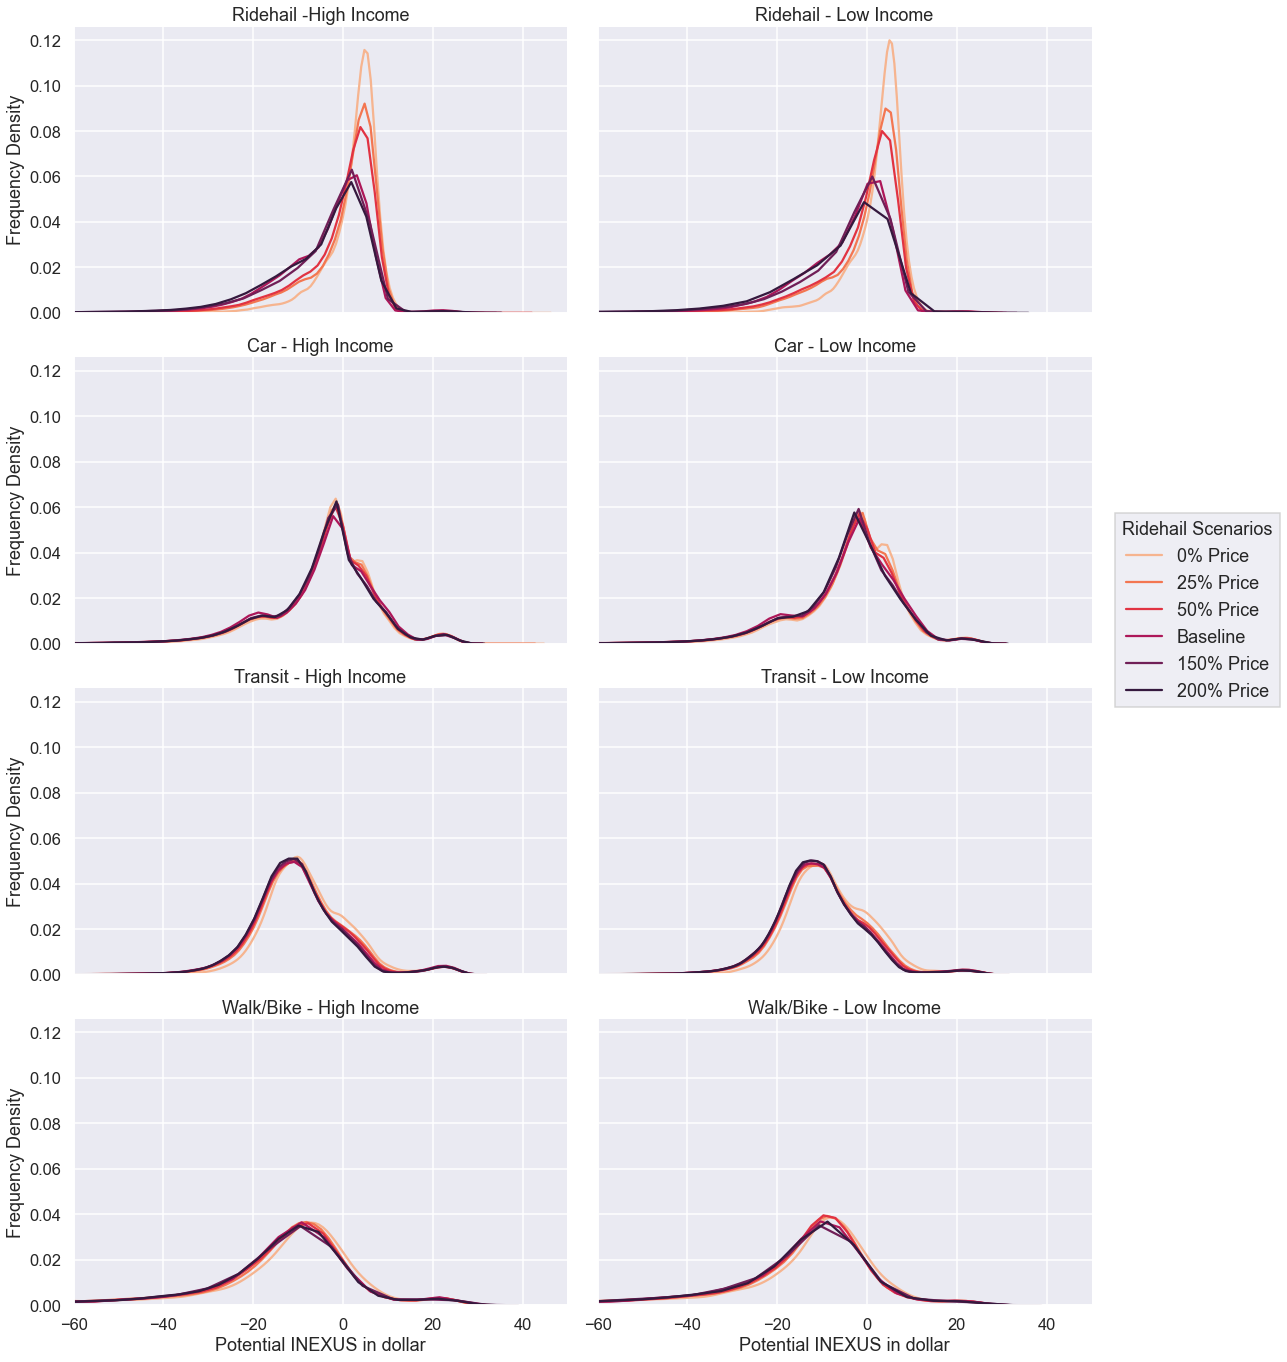

In [367]:
# Same planned mode as baseline
sns.set()
sns.set_context('talk')
sns.set_style('darkgrid')
grid = sns.FacetGrid(same_mode_planned, 
                     row = 'mode_choice_actual_4' , col='income_level', row_order=['ride_hail','car', 'transit', 'walk/bike'],
                     hue='lever_position', height=5.2, aspect=1.5, palette = "rocket_r", legend_out=True)
grid = grid.map(sns.kdeplot, 'Potential_INEXUS_in_dollar')


for ax, title in zip(grid.axes.flat, ['Ridehail -High Income', 'Ridehail - Low Income', 
                                     'Car - High Income', 'Car - Low Income',
                                     'Transit - High Income', 'Transit - Low Income',
                                     'Walk/Bike - High Income','Walk/Bike - Low Income']):
    ax.set_title(title)
    
plt.legend(title="Ridehail Scenarios", labels = ['0% Price', '25% Price','50% Price','Baseline','150% Price','200% Price'],
         fontsize='medium', fancybox=False, bbox_to_anchor=(1.4, 2.8), ncol=1, frameon=True, loc = 'best')

grid.set(xlim=(-60,50))

grid.set_ylabels('Frequency Density', size=18)
grid.set_xlabels('Potential INEXUS in dollar', size=18)
         
# Squash down a little and add title to facetgrid    
plt.subplots_adjust(top=0.9)

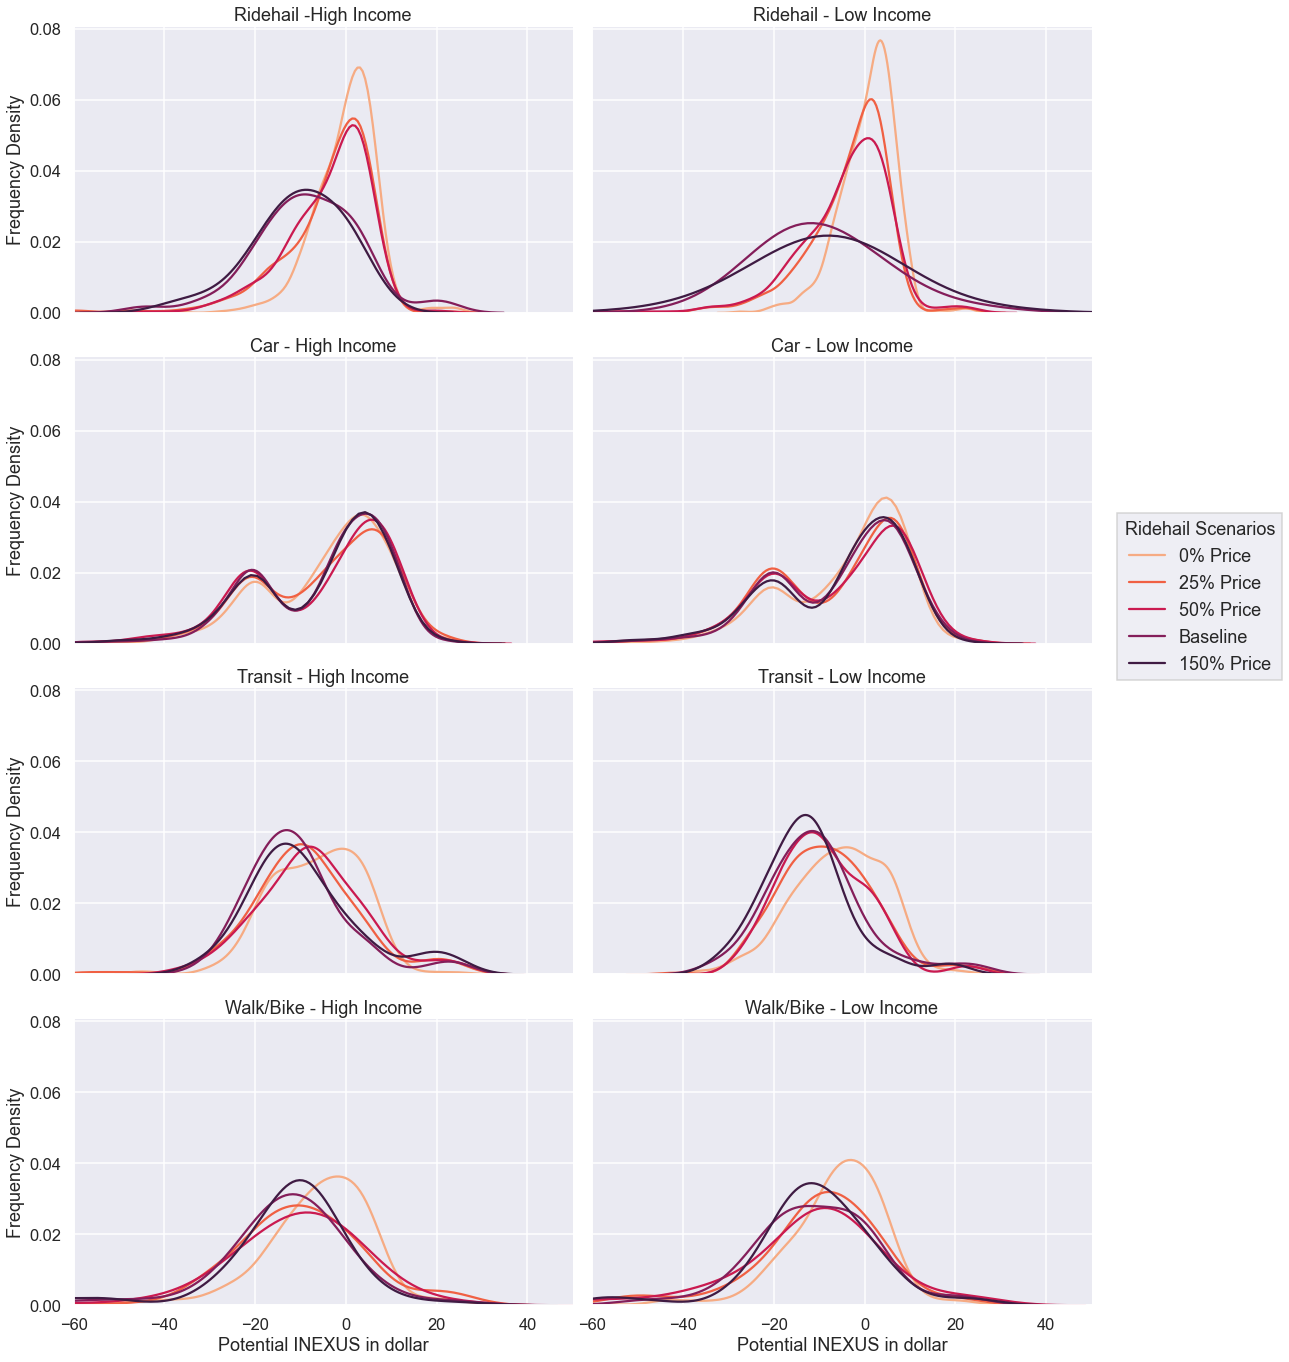

In [362]:
# Different planned mode from baseline
sns.set()
sns.set_context('talk')
sns.set_style('darkgrid')
grid = sns.FacetGrid(diff_mode_planned.head(20000), 
                     row = 'mode_choice_actual_4' , col='income_level', 
                     hue='lever_position', height=5.2, aspect=1.5, palette = "rocket_r", legend_out=True)
grid = grid.map(sns.kdeplot, 'Potential_INEXUS_in_dollar')

for ax, title in zip(grid.axes.flat, ['Ridehail -High Income', 'Ridehail - Low Income', 
                                     'Car - High Income', 'Car - Low Income',
                                     'Transit - High Income', 'Transit - Low Income',
                                     'Walk/Bike - High Income','Walk/Bike - Low Income']):
    ax.set_title(title)
    
plt.legend(title="Ridehail Scenarios", labels = ['0% Price', '25% Price','50% Price','Baseline','150% Price','200% Price'],
         fontsize='medium', fancybox=False, bbox_to_anchor=(1.4, 2.8), ncol=1, frameon=True, loc = 'best')

grid.set_ylabels('Frequency Density', size=18)
grid.set_xlabels('Potential INEXUS in dollar', size=18)

grid.set(xlim=(-60,50))

# Squash down a little and add title to facetgrid    
plt.subplots_adjust(top=0.9)
#grid.fig.suptitle('Realized INEXUS in dollar across income levels in different lever positions')